<a href="https://colab.research.google.com/github/Dheeraj16-code/labs-and-projects/blob/main/AIML_Module_5_Lab_1_Linear_Regression%2C_MSE_and_Polynomial_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Student Training Program on AIML**
# Regression Lab 1: Linear Regression, MSE and Polynomial Regression

Linear regression is a technique that is used to model a linear relationship between some data $x$ and its corresponding output $y$. When there are multiple inputs ($x_1, x_2, .. , x_n$), it is referred to as **Mutliple Linear Regression**.

Essentially, we model the relationship as $y = mx + c$. Linear regression attempts to find the $m$ and $c$ values.

To understand how linear regression works, let's first look at an example.

In [1]:
import numpy as np
from sklearn import linear_model,metrics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
# from sklearn.datasets import load_boston
from sklearn.datasets import fetch_california_housing
import pandas as pd
import seaborn as sns
import math

import warnings
warnings.filterwarnings('ignore')

from matplotlib import pyplot as plt
plt.style.use('ggplot')
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10, 8

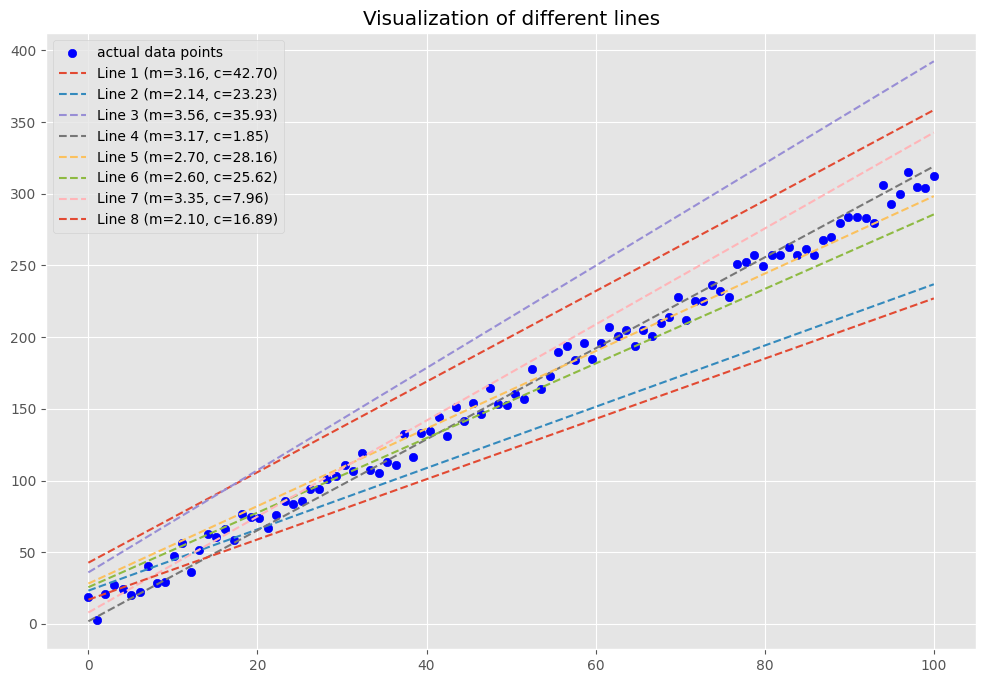

In [3]:
np.random.seed(10)

x = np.linspace(0, 100, 100).reshape((-1, 1))

plt.figure(figsize=(12, 8))
plt.title("Visualization of different lines")
plt.scatter(x, (np.random.rand(100)*25).astype(int).reshape((-1,1)) + 3*x, color="blue", label="actual data points")

# Generate and plot 8 lines with different parameters
for i in range(8):
    m = np.random.uniform(2, 4)  # Varying slope
    c = np.random.uniform(0, 50)  # Varying intercept
    y_line = m * x + c
    plt.plot(x, y_line, linestyle='--', label=f'Line {i+1} (m={m:.2f}, c={c:.2f})')

plt.legend()
plt.show()

## Brute-force solution

Let's first think of a naive appraoch to this problem. Since we want to find the values of $m$ and $c$, we can do a search in the space of possible $m$ and $c$ values, and pick the line with the least average distance from the actual data.

Best m: 3, Best c: 4, Min average distance: 8.43


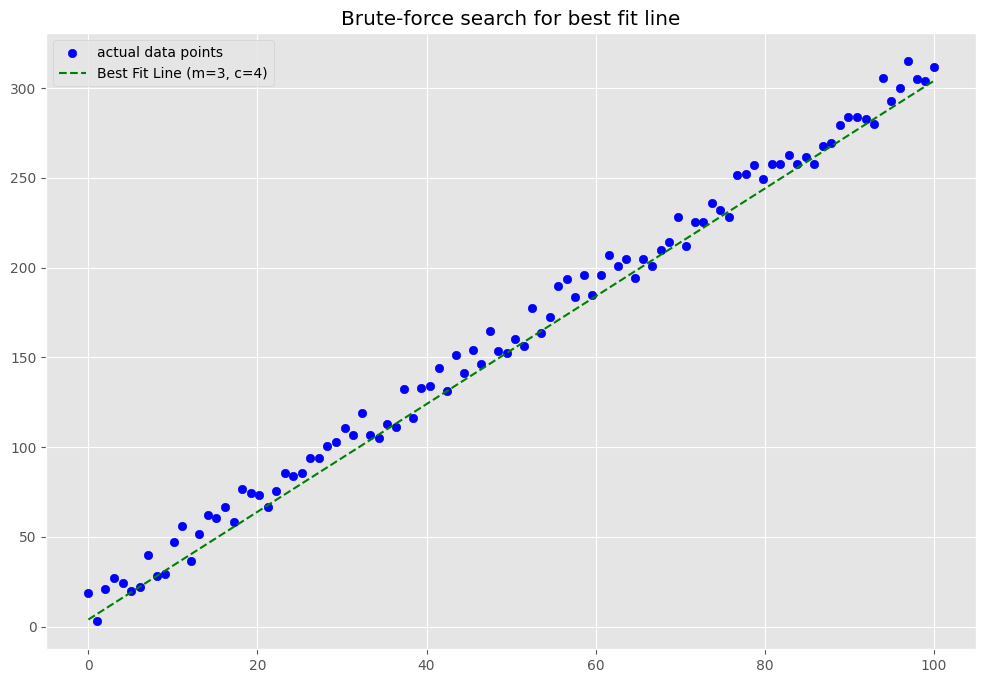

In [5]:
np.random.seed(10)

x = np.linspace(0, 100, 100).reshape((-1, 1))
y = (np.random.rand(100)*25).astype(int).reshape((-1,1)) + 3*x

best_m = None
best_c = None
min_avg_distance = float('inf')

plt.figure(figsize=(12, 8))
plt.scatter(x, y, color="blue", label="actual data points")

# Brute-force search for best m and c
for m in range(-2, 6):
    for c in range(-5, 5):
        py = (m * x + c).reshape((-1, 1))
        avg_distance = np.mean(np.sqrt((y - py)**2))

        if avg_distance < min_avg_distance:
            min_avg_distance = avg_distance
            best_m = m
            best_c = c

        # Optional: plot each line to visualize the search (can be slow)
        # plt.plot(x, py, color="red", alpha=0.1)


print(f"Best m: {best_m}, Best c: {best_c}, Min average distance: {min_avg_distance:.2f}")

# Plot the best fit line
best_py = (best_m * x + best_c).reshape((-1, 1))
plt.plot(x, best_py, color="green", linestyle='--', label=f'Best Fit Line (m={best_m}, c={best_c})')

plt.title("Brute-force search for best fit line")
plt.legend()
plt.show()

Looking at the graphs, the best solution from the brute-force method doesn't seem too bad. In fact, an average distance of 6 isn't bad at all! But, there's one obvious drawback to this approach: it's very inefficient. The search space for the given data may be low, but that is not always the case. Additionally, this approach doesn't guarantee the best possible values. Unless we make the $\delta m$ and $\delta c$ very infinitesimally small (which would make this solution extremely slow), the "best" value obtained may not even be close to the best possible value. So, how do we fix this issue? We turn to a technique called **linear regression**.   

The coefficient is: 2.99 and the intercept is: 12.06

The MSE for linear regression is: 44.95
The RMSE for linear regression is: 6.70


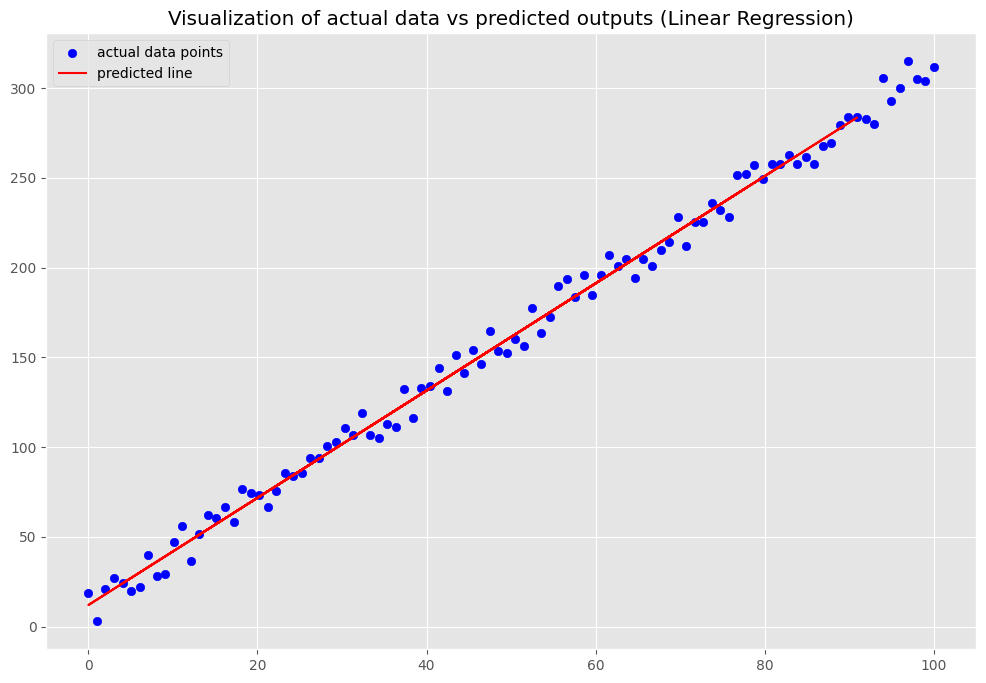

In [7]:
def lin_regression(x, y):

  # learning the coefficient and intercept
  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

  m1 = linear_model.LinearRegression()
  m1.fit(x_train, y_train)

  print(f"The coefficient is: {m1.coef_[0][0]:.2f} and the intercept is: {m1.intercept_[0]:.2f}\n")

  y_pred = m1.predict(x_test)
  mse = metrics.mean_squared_error(y_pred, y_test)
  print(f"The MSE for linear regression is: {mse:.2f}")
  print(f"The RMSE for linear regression is: {math.sqrt(mse):.2f}")


  # plotting data and predictions
  plt.figure(figsize=(12, 8))
  plt.title("Visualization of actual data vs predicted outputs (Linear Regression)")
  plt.scatter(x, y, color="blue", label="actual data points")
  plt.plot(x_test, y_pred, color="red", label="predicted line")
  plt.legend()
  plt.show()

# Generate some data
np.random.seed(10)
x = np.linspace(0, 100, 100).reshape((-1, 1))
y = (np.random.rand(100)*25).astype(int).reshape((-1,1)) + 3*x

# Run the linear regression function
lin_regression(x, y)

The coefficient is: 2.99 and the intercept is: 12.06

The MSE for linear regression is: 44.95
The RMSE for linear regression is: 6.70


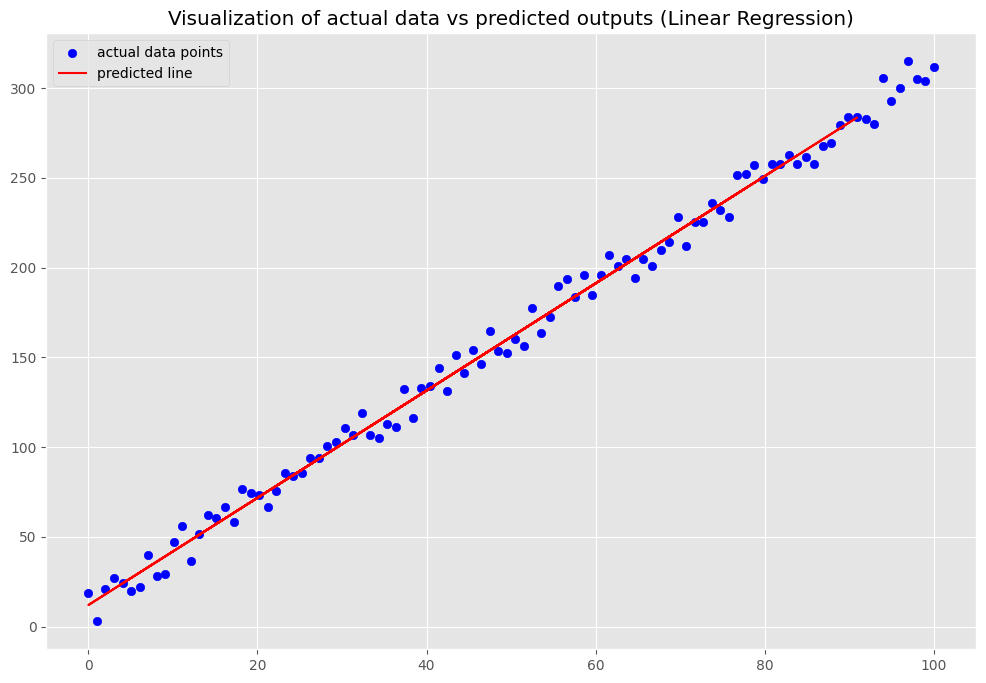

In [8]:
lin_regression(x,y)

From the above graph, we can see that the predicted line is pretty close to the actual linear relationship between $x$ and $y$. But, how does linear regression actually work ?

The main goal of linear regression (or regression in general) is to minimize the **error** of the model. Typically, **mean squared error (MSE)** is used as the error term.

Suppose we have some data $x$ and outputs $y$. Now, we obtain some predictions $y_p$ for $x$ using our linear regression model.
The mean squared error is then defined as:

$E = \frac{1}{m} \sum_{i=1}^n (y-y_p)^2$

intuitively, we can think of it as a distance between the actual value and the predicted value. By giving our regression model "feedback" on how far it is, it eventually learns the correct relationship between $x$ and $y$. So, the model tries to learn the values of $m$ and $c$ for which the equation $y=mx +c$ has the least error.

Generally, we look at the Root Mean Squared Error during analysis.

## The need for polynomial regression

The drawback with linear regression is that it tries to model a linear relationship between $x$ and $y$. More often than not, data does cannot be modelled by a linear equation. Let's look at an example of how linear regression falls short.

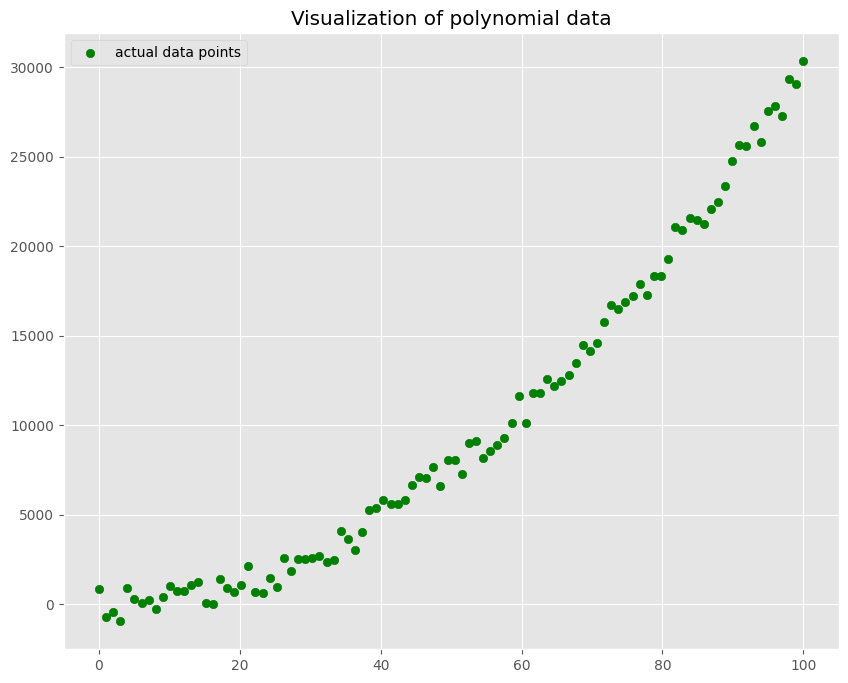

In [11]:
# simple polynomial with noise

y2 = (np.random.randint(-1000,1000,x.shape)).astype(int).reshape((-1,1)) + 3*x**2
plt.scatter(x,y2,color="green")
plt.title("Visualization of polynomial data")
plt.legend(["actual data points"])
plt.show()

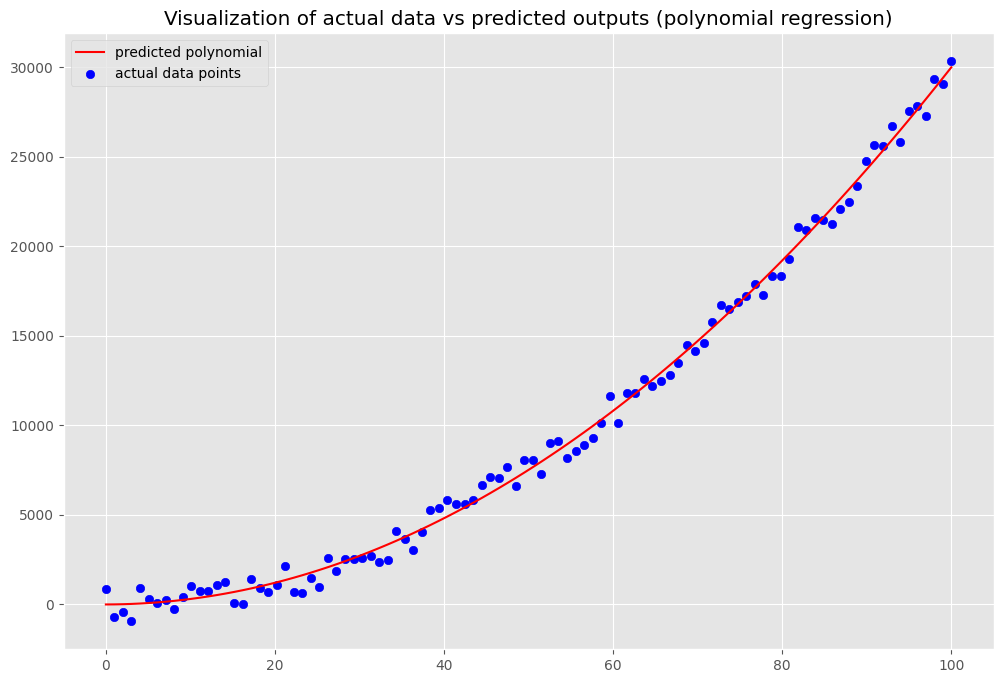

The RMSE for polynomial regression is: 582.5613154364926


In [13]:
# POLYNOMIAL REGRESSION

def poly_regression(x,y,deg):

  x = x.reshape((-1,1))
  y = y.reshape((-1,1))

  poly = PolynomialFeatures(degree=deg)

  x_ = poly.fit_transform(x)
  poly.fit(x_,y)

  m1 = linear_model.LinearRegression()
  m1.fit(x_,y)
  y_pred = m1.predict(x_)

  mse = np.sqrt(metrics.mean_squared_error(y_pred,y))

  plt.figure(figsize=(12, 8))
  plt.plot(x,y_pred,color="red")
  plt.title("Visualization of actual data vs predicted outputs (polynomial regression)")
  plt.scatter(x,y,color="blue")
  plt.legend(["predicted polynomial","actual data points"])
  plt.show()

  print("The RMSE for polynomial regression is: {}".format(mse))

# Example usage with the previously generated polynomial data (y2)
poly_regression(x, y2, deg=2) # Using degree 2 for a quadratic relationship

The coefficient is: 306.93 and the intercept is: -5344.32

The MSE for linear regression is: 5916653.12
The RMSE for linear regression is: 2432.42


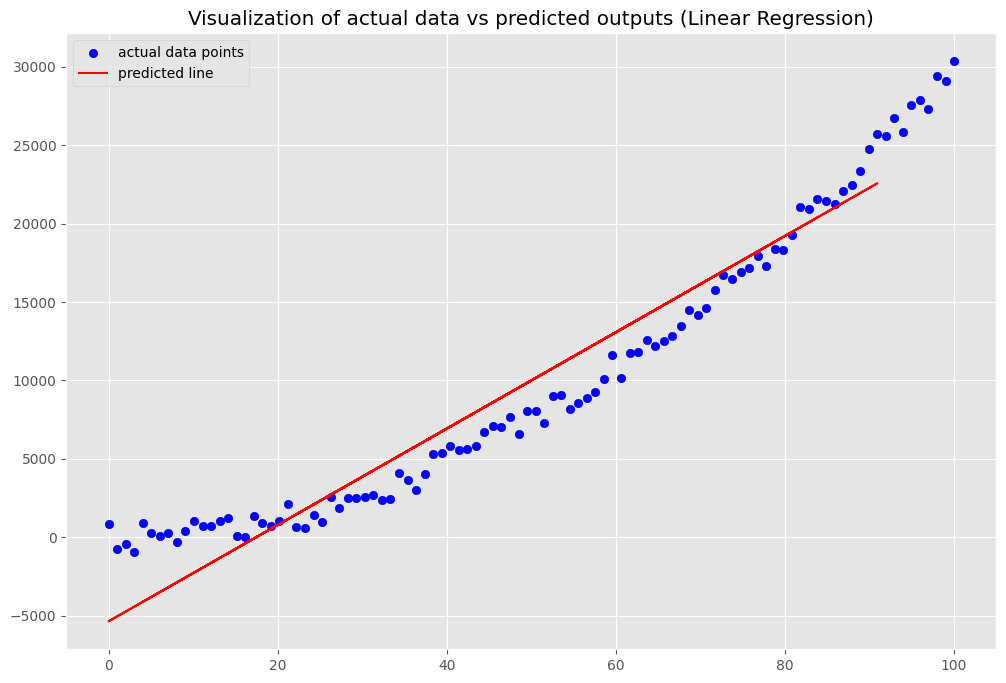

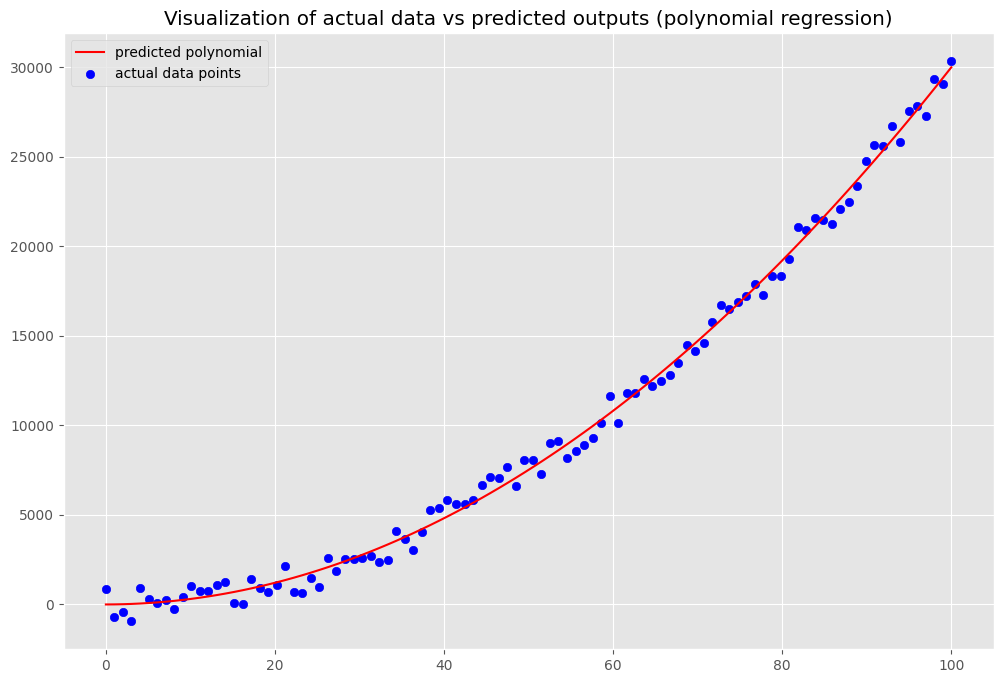

The RMSE for polynomial regression is: 582.5613154364926


In [15]:
lin_regression(x,y2)

poly_regression(x,y2,2)

# Applying linear regression to housing data

Now that we have an idea of how linear regression works, let's apply it to predicting the price of houses. The dataset being used is the California housing dataset. First, let's take a look at the data.

In [16]:
df = pd.read_csv("https://raw.githubusercontent.com/ageron/handson-ml/master/datasets/housing/housing.csv")
df['MEDV'] = df['median_house_value']
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,MEDV
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,342200.0


1. MedInc - It is the median income in block group
2. HouseAge - It is the median house age in block group
3. AveRooms - It is the average number of rooms per household
4. AveBedrms - It is the average number of bedrooms per household
5. Population - It is the block group population
6. AveOccup - It is the average number of household members
7. Latitude - It is the block group latitude
8. Longitude - It is the block group longitude
9. MEDV - The target variable is the median house value for California districts, expressed in hundreds of thousands of dollars ($100,000).




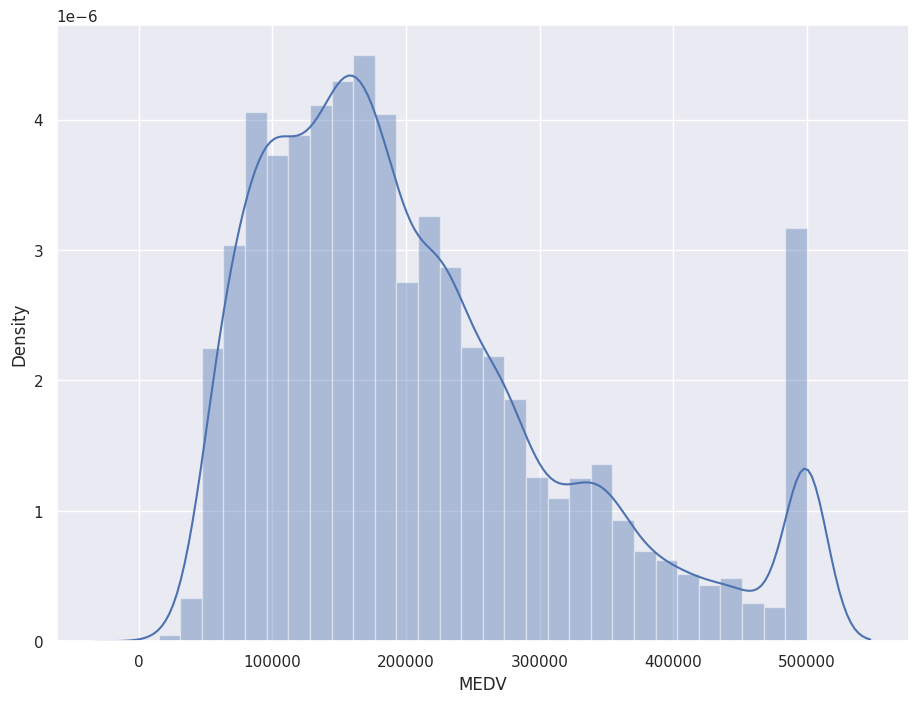

In [19]:
sns.set(rc={'figure.figsize':(11,8)})
sns.distplot(df['MEDV'], bins=30)
plt.show()

In [20]:
df.drop(['ocean_proximity'],inplace=True,axis=1)

<Axes: >

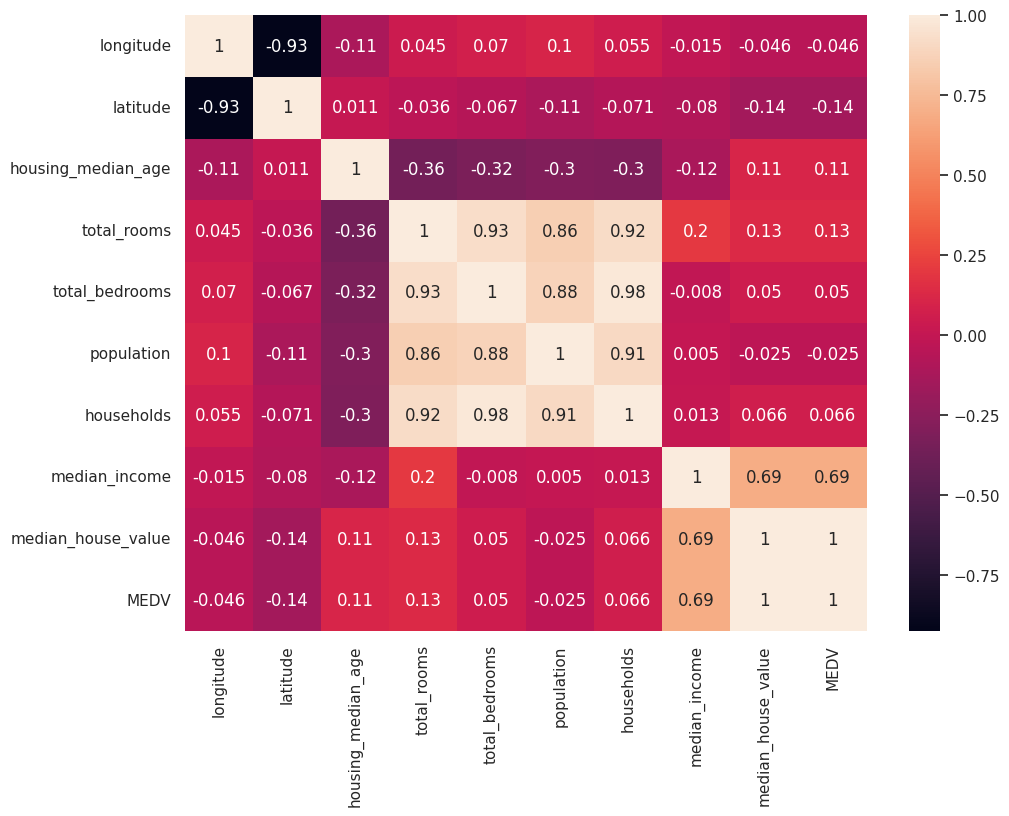

In [22]:
correlation_matrix = df.corr().round(3)
sns.heatmap(data=correlation_matrix, annot=True)

The target value MEDV appears to be a normal distribution with some underlying noise. To better understand the linear relationships between the features and the MEDV value, we can use a correlation matrix. This can be neatly visualized with a heatmap

From the plot, we see that MedInc has a high positive correlation with MEDV (0.69). So, we'll pick that as the feature with which we train our regression model.

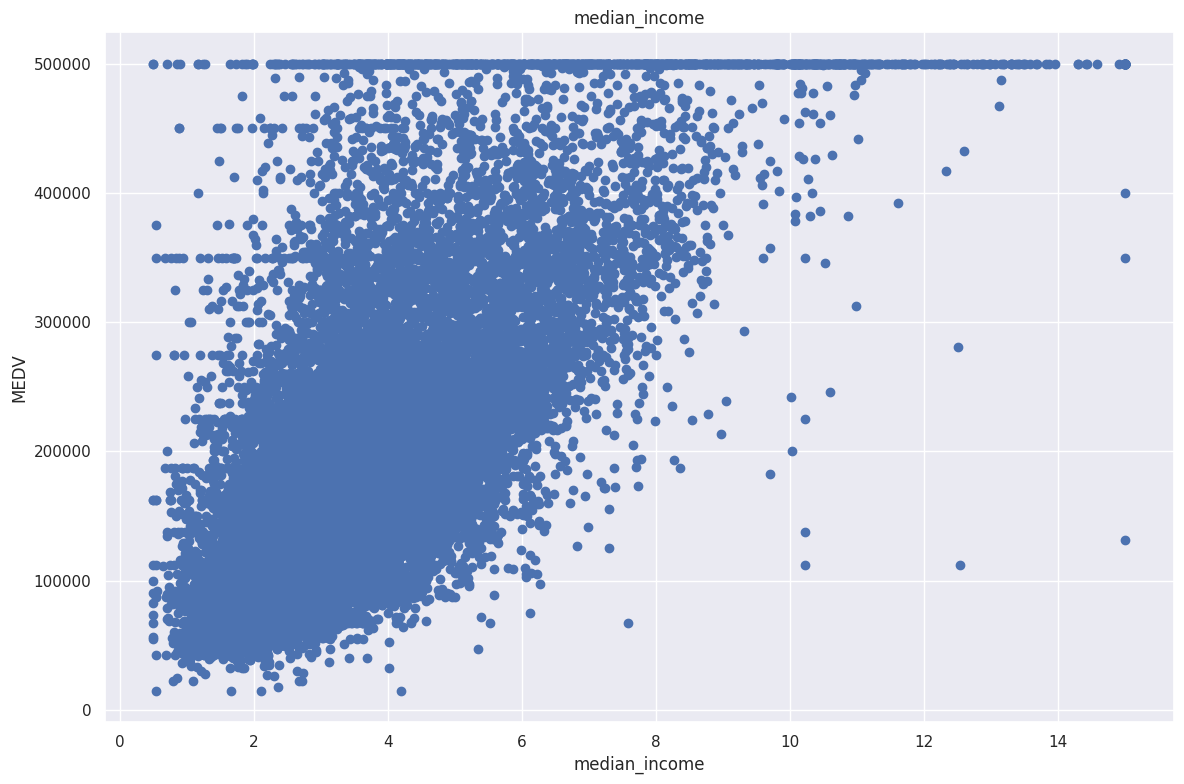

In [24]:
plt.figure(figsize=(12, 8))

features = ['median_income']
target = df['MEDV']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    house_features = df[col]
    target_price = target
    plt.scatter(house_features, target_price, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('MEDV')

plt.tight_layout()
plt.show()

We can see from the plot that the relationship between MEDV.

In [26]:
x_ex = pd.DataFrame(np.c_[df['median_income']], columns = ['median_income'])
y_ex = df['MEDV']

x_ex_train, x_ex_test, y_ex_train, y_ex_test = train_test_split(x_ex, y_ex, test_size = 0.2, random_state=42)

lin_model = linear_model.LinearRegression()
lin_model.fit(x_ex_train, y_ex_train)

LinearRegression()

In [ ]:
y_ex_train_predict = lin_model.predict(x_ex_train)
rmse = (np.sqrt(metrics.mean_squared_error(y_ex_train, y_ex_train_predict)))
r2 = metrics.r2_score(y_ex_train, y_ex_train_predict)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}\n'.format(rmse))


y_ex_test_predict = lin_model.predict(x_ex_test)
rmse = (np.sqrt(metrics.mean_squared_error(y_ex_test, y_ex_test_predict)))
r2 = metrics.r2_score(y_ex_test, y_ex_test_predict)

print("Model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))

The model performance for training set
--------------------------------------
RMSE is 83614.87409655548

Model performance for testing set
--------------------------------------
RMSE is 84209.01241414454


## Exercises

### 1. Higher Degree Polynomials

We have seen a graph of a linear regression model attempting to represent polynomial data, and how it falls short when trying to model non-linear data. Now, what if we took some non-linear noisy data, and fit a very high degree polynomial to it? Try to guess what would happen!

(Change the polynomial degree in the slider and run the cell)

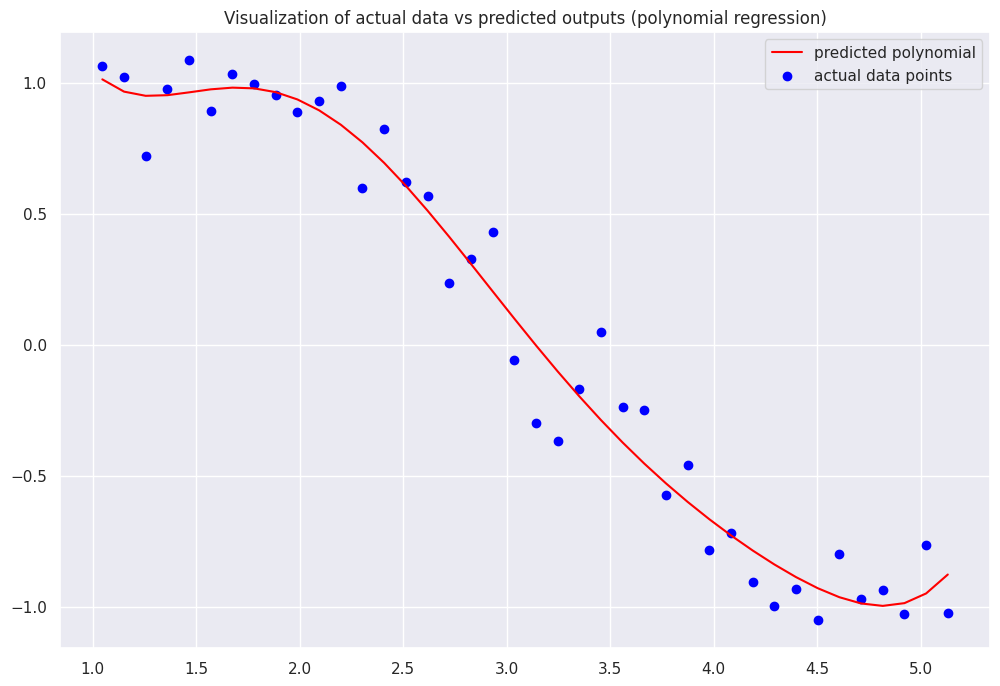

The RMSE for polynomial regression is: 0.1396907437369473


The actual data is a noisy sine wave. We can see from the graphs that the higher degree polynomials are too sensitive to the noisy data, they pass through the outliers in data. This is known as **overfitting**. We will explore overfitting in more detail in a later lab.

2. Try running the above with degree set to 1. You will observe that only higher degree polynomials are able to fit to such noisy data.

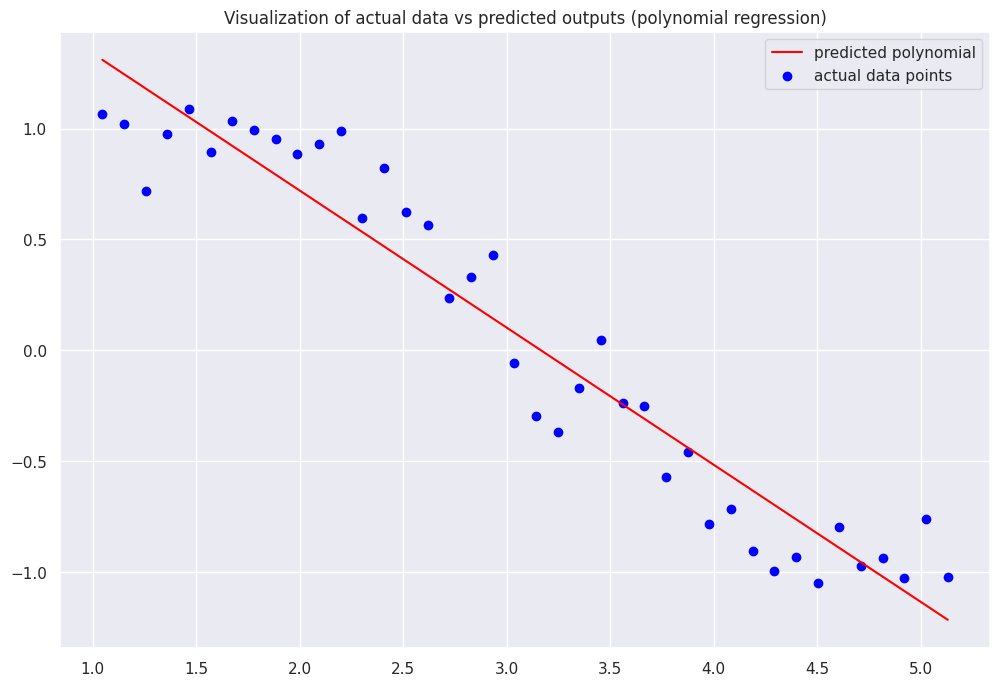

The RMSE for polynomial regression is: 0.21526437026076664


In [30]:
# Use the same noisy sinusoidal data generated in the previous cell
# x_ex and y_ex are already defined from the previous cell

# Run polynomial regression with degree 1
poly_regression(x_ex, y_ex, deg=1)

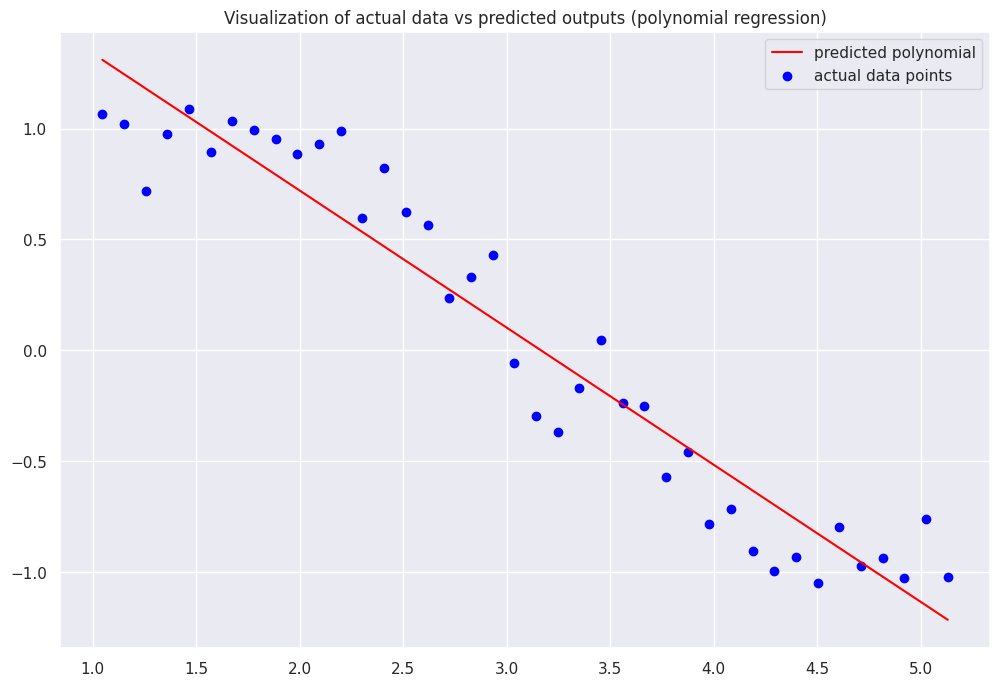

The RMSE for polynomial regression is: 0.21526437026076664


In [32]:
deg = 1

np.random.seed(10)

x_ex = np.array([i*np.pi/180 for i in range(60,300,6)])
y_ex = np.sin(x_ex) + np.random.normal(0,0.15,len(x_ex))

# Reshape x_ex to be a 2D array
x_ex = x_ex.reshape(-1, 1)

poly_regression(x_ex, y_ex, deg)